In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


First, Handling Missing Values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Nothing Missing, So Next Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

Nothing Duplicates, So Next Remove Irrelavant Features 

In [7]:
# Drop the 'customerID' column as it is not useful for prediction
df.drop(columns=['customerID'], inplace=True)

Fixxing Structural Errors

In [8]:
# Convert 'TotalCharges' to numeric ( float) 
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges']) by running above code occured error and iedntify there is whitespace in the column
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [9]:
# will try to convert the column to numeric again
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [10]:
# will see now how manu null values are in the column
df['TotalCharges'].isnull().sum()

np.int64(11)

In [11]:
# as a perecentage of the total number of rows in the dataset
missing_percentage = df['TotalCharges'].isnull().sum() / df.shape[0] * 100
print(f"Missing TotalCharges: {missing_percentage:.2f}%")

Missing TotalCharges: 0.16%


In [12]:
# as the perecentage of missing value is 0.16% we can drop the rows with missing values
df.dropna(subset=['TotalCharges'], inplace=True)

In [13]:
# check inconsistent labels 
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Churn: ['No' 'Yes']


Next, Filtering Outliers

Text(0.5, 1.0, 'Boxplot of Tenure')

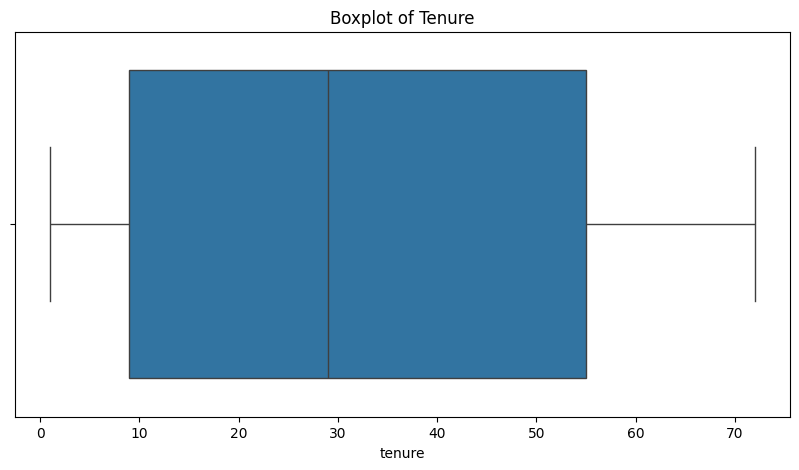

In [14]:
# check the outliers in tenure column usign boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['tenure'])
plt.title('Boxplot of Tenure')


Text(0.5, 1.0, 'Boxplot of Monthly Charges')

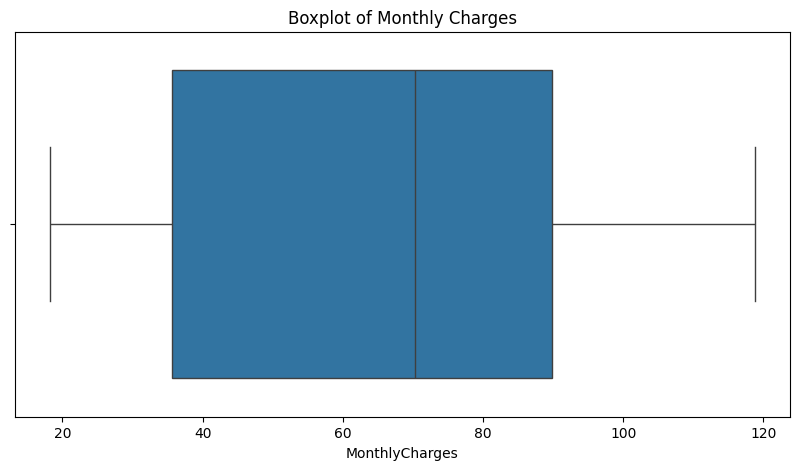

In [15]:
# check the outliers in MonthlyCharges column usign boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')

Text(0.5, 1.0, 'Boxplot of Total Charges')

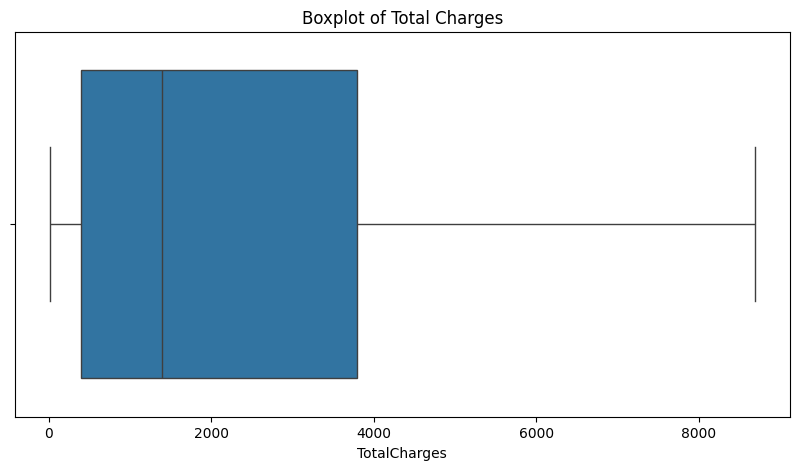

In [16]:
# check the outliers in TotalCharges column usign boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot of Total Charges')

As, we see in visualizing there is no outliers 
Next move to Data Preprocessing

In [17]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)
# check the new columns created by one-hot encoding
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [18]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


C:\Users\user\AppData\Local\Temp\ipykernel_12268\4043229899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


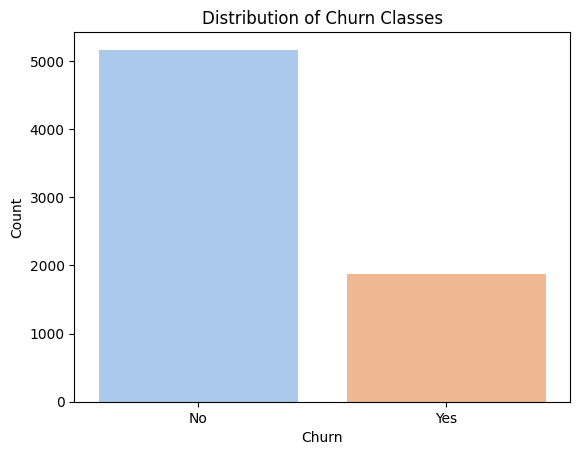

In [19]:
# handle the imbalanced dataset using SMOTE 
# Count plot
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribution of Churn Classes')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

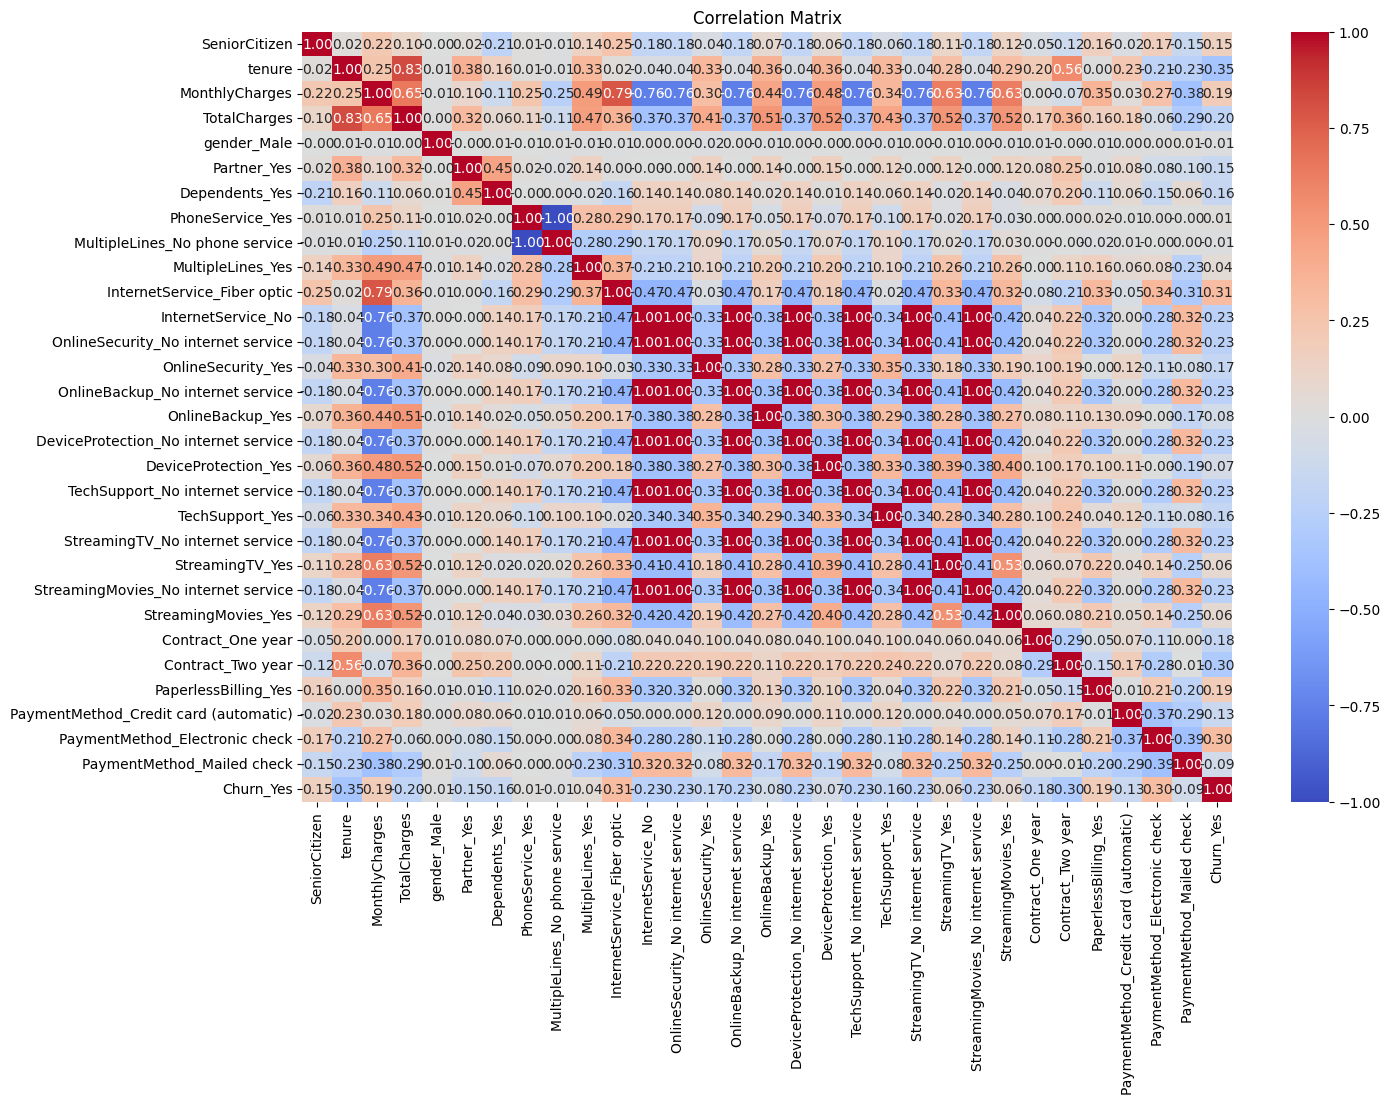

In [20]:
# visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Split the data into features and target variable
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (5625, 30)
X_test shape: (1407, 30)


In [1]:
%pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# SMOTE is used to handle the imbalanced dataset

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")


X_train_resampled shape: (8260, 30)
y_train_resampled shape: (8260,)


In [23]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [24]:
# Train a Logistic Regression model, Decision Tree model, and Random Forest model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))



Logistic Regression Model
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1033
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407

Confusion Matrix:
[[845 188]
 [128 246]]


In [27]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Model
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1033
           1       0.46      0.54      0.50       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.71      0.72      1407

Confusion Matrix:
[[795 238]
 [172 202]]


In [28]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Model
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407

Confusion Matrix:
[[859 174]
 [147 227]]


C:\Users\user\AppData\Local\Temp\ipykernel_12268\2587228516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='viridis')


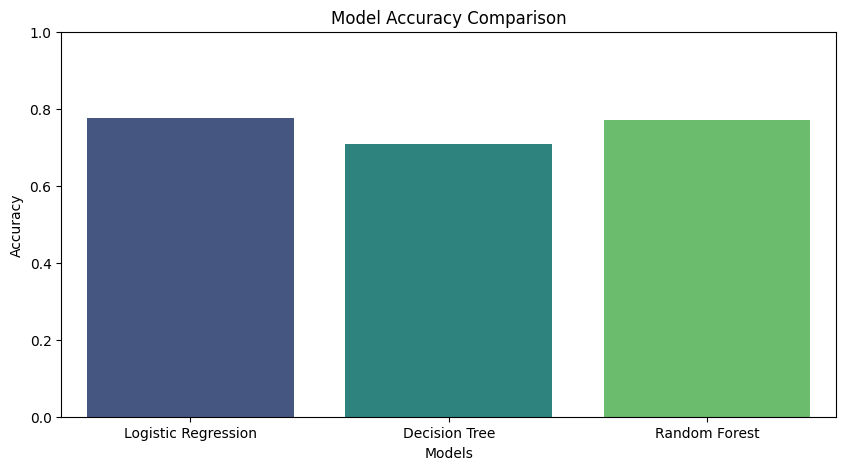

In [31]:
# compare the models accuracy, F1 score, recall, and precision
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()